In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import arcpy

```
#create a list of years
year = [2020, 2021, 2022, 2023, 2024] 

#create a list of months in a year
wint_months = [12,1,2]
spr_months = [3,4,5]
sum_months = [6,7,8]
fall_months = [9,10,11]

#create a dictionary of seasons
month_dict = {'wint_months': wint_months, 'spr_months': spr_months, 
              'sum_months': sum_months, 'fall_months': fall_months}

#subset data to each season and area and export     
for key in month_dict:

    month_sub_sst = sst[sst['time'].dt.year.isin(year) & sst['time'].dt.month.isin(month_dict[key])].sel(longitude=slice(-80,-65), latitude=slice(45,25))
    month_sub_sst.to_netcdf("N:/MP_Noor/Data/MODIS/sst_{}.nc".format(key))
```


In [3]:
#Read the file into a netCDF dataset object
fileName = 'sst_fall_months.nc'
dataset = xr.open_dataset(fileName)

In [4]:
#Open and extractt dataset
dataset = xr.open_dataset(fileName)
dataset

<xarray.Dataset>
Dimensions:                  (time: 403, altitude: 1, latitude: 533,
                              longitude: 400)
Coordinates:
  * time                     (time) datetime64[ns] 2020-09-01T12:00:00 ... 20...
  * altitude                 (altitude) float64 0.0
  * latitude                 (latitude) float64 44.98 44.94 ... 25.07 25.03
  * longitude                (longitude) float64 -79.97 -79.93 ... -65.04 -65.01
Data variables:
    sea_surface_temperature  (time, altitude, latitude, longitude) float32 ...

In [5]:
#Save SST values into a single data array
fall_sst = dataset['sea_surface_temperature'].drop_indexes('altitude')

In [6]:
#Extract time dimension from the data array
fall_sst_time = fall_sst.time
fall_sst_time

<xarray.DataArray 'time' (time: 403)>
array(['2020-09-01T12:00:00.000000000', '2020-09-02T12:00:00.000000000',
       '2020-09-03T12:00:00.000000000', ..., '2024-11-09T12:00:00.000000000',
       '2024-11-10T12:00:00.000000000', '2024-11-11T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-09-01T12:00:00 ... 2024-11-11T12:00:00

In [39]:
#Display first 5 in the time array
fall_sst['latitude'].values

array([44.98125, 44.94375, 44.90625, 44.86875, 44.83125, 44.79375,
       44.75625, 44.71875, 44.68125, 44.64375, 44.60625, 44.56875,
       44.53125, 44.49375, 44.45625, 44.41875, 44.38125, 44.34375,
       44.30625, 44.26875, 44.23125, 44.19375, 44.15625, 44.11875,
       44.08125, 44.04375, 44.00625, 43.96875, 43.93125, 43.89375,
       43.85625, 43.81875, 43.78125, 43.74375, 43.70625, 43.66875,
       43.63125, 43.59375, 43.55625, 43.51875, 43.48125, 43.44375,
       43.40625, 43.36875, 43.33125, 43.29375, 43.25625, 43.21875,
       43.18125, 43.14375, 43.10625, 43.06875, 43.03125, 42.99375,
       42.95625, 42.91875, 42.88125, 42.84375, 42.80625, 42.76875,
       42.73125, 42.69375, 42.65625, 42.61875, 42.58125, 42.54375,
       42.50625, 42.46875, 42.43125, 42.39375, 42.35625, 42.31875,
       42.28125, 42.24375, 42.20625, 42.16875, 42.13125, 42.09375,
       42.05625, 42.01875, 41.98125, 41.94375, 41.90625, 41.86875,
       41.83125, 41.79375, 41.75625, 41.71875, 41.68125, 41.64

In [8]:
#Extract out the lat and long
fall_sst_lon = fall_sst.longitude
fall_sst_lat = fall_sst.latitude

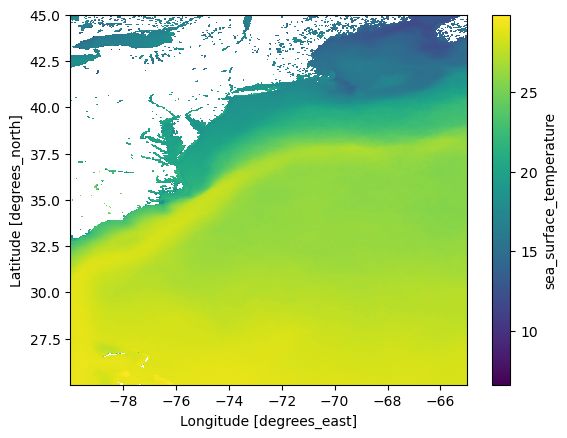

In [9]:
#Calculate mean for the fall using time as the dimension
data_mean = fall_sst.mean(dim='time').drop_vars('altitude')
data_mean.plot();

In [31]:
#Get lower left corner
xmin = float(data_mean['longitude'].min())
ymin = float(data_mean['latitude'].min())
llc = arcpy.Point(xmin,ymin)

In [32]:
data_mean

<xarray.DataArray 'sea_surface_temperature' (altitude: 1, latitude: 533,
                                             longitude: 400)>
array([[[17.104185, 17.066889,       nan, ...,       nan,       nan,
               nan],
        [17.07294 , 16.920618, 17.055984, ...,       nan,       nan,
               nan],
        [16.812696, 17.030025, 17.171574, ...,       nan,       nan,
               nan],
        ...,
        [29.087774, 29.08444 , 29.06164 , ..., 28.442318, 28.429226,
         28.427927],
        [29.04299 , 29.07981 , 29.108332, ..., 28.466106, 28.420778,
         28.387337],
        [29.040058, 29.052658, 29.088888, ..., 28.440903, 28.41703 ,
         28.398361]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 44.98 44.94 44.91 44.87 ... 25.11 25.07 25.03
  * longitude  (longitude) float64 -79.97 -79.93 -79.89 ... -65.08 -65.04 -65.01
Dimensions without coordinates: altitude

In [18]:
arr_sst = data_mean.to_numpy()
arr_sst[0]

array([[17.104185, 17.066889,       nan, ...,       nan,       nan,
              nan],
       [17.07294 , 16.920618, 17.055984, ...,       nan,       nan,
              nan],
       [16.812696, 17.030025, 17.171574, ...,       nan,       nan,
              nan],
       ...,
       [29.087774, 29.08444 , 29.06164 , ..., 28.442318, 28.429226,
        28.427927],
       [29.04299 , 29.07981 , 29.108332, ..., 28.466106, 28.420778,
        28.387337],
       [29.040058, 29.052658, 29.088888, ..., 28.440903, 28.41703 ,
        28.398361]], dtype=float32)

In [49]:
sf = 'N:/MP_Noor/Data/Covariates/Covariates_tool_polygon_all.shp'

In [51]:
Zstat = arcpy.sa.ZonalStatisticsAsTable(sf,'NAME',data_mean,'sst_mean_table',"DATA","MEAN")

RuntimeError: Object: Error in executing tool